# Project 2  Exploratory Data Analysis (EDA) example

# 2.1. Описание задачи

*Условие задачи*

Вы работаете в крупной корпорации в сфере FMCG (Fast-Moving Consumer Goods) на позиции Junior Data Scientist. 
перед вами поставили задачу создать модель, которая бы предсказывала оценку нового продукта конечными пользователями.

В этом кейсе мы познакомимся с тем, как проводить EDA на примере исследования о качестве шоколадных батончиков. EDA поможет нам первично проверить гипотезу о связи различных переменных с рейтингом батончика.

В датасете представлены следующие данные:

Bar id — ID батончика в базе данных

Company (Maker-if known) — название компании, изготовившей батончик.

Specific Bean Origin or Bar Name — точное место происхождения какао-бобов.

Broad Bean Origin — название региона, где были выращены какао-бобы.

Company Location — страна, в которой произведён шоколадный батончик.

Bean Type — вид какао-бобов, используемых в батончике.

REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.

Review Date — год публикации рецензии.

Cocoa Percent — процент какао в шоколаде.

Rating — оценка батончика фокус-группой.

# 2.2. Первичный отсмотр данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math

In [2]:
pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок
cacao = pd.read_csv('cacao_flavors.csv')

In [3]:
display(cacao.head(10))

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [4]:
cacao.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


# 2.3. Первичный анализ данных в столбцах. Часть I

In [5]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [6]:
cacao.rename(columns={'Bar id':'bar_id', 
                   'Company \n(Maker-if known)':'company',
                   'Specific Bean Origin\nor Bar Name':'specific_origin', 
                   'REF':'ref', 'Review\nDate':'review_date',
                   'Cocoa\nPercent':'cocoa_percent', 
                   'Company\nLocation':'company_location', 
                   'Rating':'rating', 
                   'Bean\nType':'bean_type',
                   'Broad Bean\nOrigin':'broad_origin'}, inplace=True)

In [7]:
display(cacao.head(5))

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## Теперь рассмотрим все 10 (!) столбцов по отдельности

1795


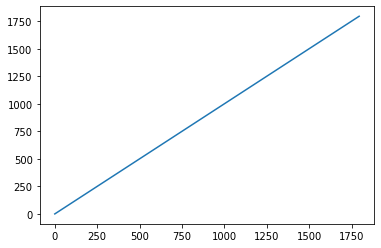

In [8]:
# bar_id
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [9]:
# Тут все просто: это столбец индексов батончиков, количество уникальных значений соответствует 
# количеству строк. Вряд ли он пригодится для дальнейшего анализа, удалим его.
cacao.drop(['bar_id'], inplace = True, axis = 1)

## Посмотрим, сколько компаний содержит наш датасет (company) 

In [10]:

pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
...,...
Chocablog,1
Vietcacao (A. Morin),1
Chuao Chocolatier,1
Cloudforest,1


### Задание 2.3.1
Сколько уникальных компаний содержится в датасете?

In [11]:
print(cacao.company.nunique())

408


Так как одно значение пустое то ответ = 407

In [12]:
# Да уж, немало.
# Попробуем отфильтровать лишние данные и выведем только те компании, 
# у которых в рейтинге больше 10 продуктов.


In [13]:
# для начала уберем пустые значения из столбца чтобы они не попадали в статистику
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [14]:
# проверим что пустого значения уже нет
display(pd.DataFrame(cacao.company.value_counts()))

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Chocablog,1
Vietcacao (A. Morin),1
Chuao Chocolatier,1
Cloudforest,1


In [15]:
# а теперь выведем сколько случаев более 10 раз
print("Значений, встретившихся в столбце более 10 раз:"
      #Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


Итого у нас 407 уникальных значений и 99 строк, в которых производитель неизвестен. А вот компаний, у которых в рейтинге больше 10 батончиков, всего 30. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много.

## Давайте сделаем то же самое для столбца с местом происхождения какао-бобов. (specific_origin)

In [16]:
# сколько мест происхождения содержит наш датасет
pd.DataFrame(cacao.specific_origin.value_counts())

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
"Chuno, triple turned, Xoco",1
Guapiles,1
Grand Cru Dominican Republic,1
"Canoabo, 2013",1


## Задание 2.3.2
Сколько уникальных регионов в датасете?

In [17]:
print(cacao.specific_origin.nunique())

1013


Так как одно значение пустое, то ответ = 1012

### Задание 2.3.3

Сколько значений, встретившихся в столбце более 10 раз?

In [18]:
# для начала уберем пустые значения из столбца чтобы они не попадали в статистику
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [19]:
# проверим что пустого значения уже нет
display(pd.DataFrame(cacao.specific_origin.value_counts()))

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
...,...
"La Red, Guaconejo",1
"Chuno, triple turned, Xoco",1
Guapiles,1
Grand Cru Dominican Republic,1


In [20]:
# а теперь выведем сколько случаев более 10 раз
print("Значений, встретившихся в столбце более 10 раз:"
      #Число 10 взято для ориентира, можно брать другое
      , (cacao.specific_origin.value_counts()>10).sum())
cacao.loc[:, ['specific_origin']].info()

Значений, встретившихся в столбце более 10 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   specific_origin  1737 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


Итого у нас 1012 уникальных значений и 55 строк, в которых место происхождения неизвестно. А вот мест происхождения, у которых в рейтинге больше 10 упоминаний, всего 15. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много.

## посмотрим на распределение столбца REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

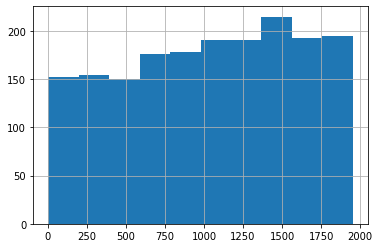

In [21]:
cacao.ref.hist()
cacao.ref.describe()

Как видно, у этого признака нормальное распределение, выбросов нет. Заметен тренд на возрастание количества отзывов со временем (так как REF обозначает время внесения отзыва в базу). Интересно, почему так происходит?

## посмотрим на распределение столбца Review Date — год публикации рецензии 

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

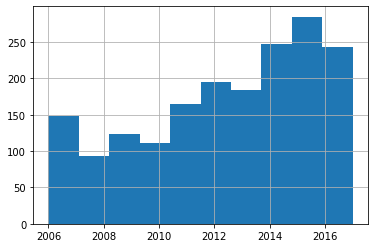

In [22]:
cacao.review_date.hist()
cacao.review_date.describe()

### Задание 2.3.4

Содержит ли этот столбец выбросы?

Визуально кажется что слева есть что-то похожее на выброс, но чтобы убедиться лучше построить ящик с усами (box-plot)

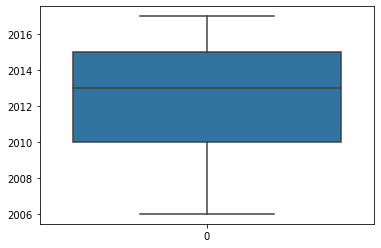

In [23]:
sns.boxplot( data=cacao.review_date)

Ну вот видно что выбросов нет

## посмотрим на распределение столбца Cocoa Percent — процент какао в шоколаде

In [24]:
# Посмотрим на данные в столбце:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [25]:
# Значения в столбцах представлены в виде процентов. 
# Для дальнейшего анализа будет проще, если они будут представлены числами. 
# Трансформируем столбец:

cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

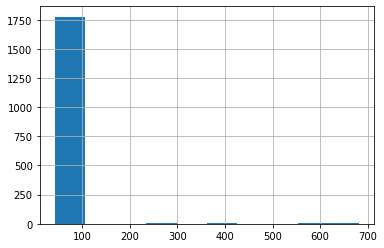

In [26]:
# Посмотрим распределение признака:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

Видим, что основное распределение лежит между  и  процентами и есть потенциальные выбросы свыше % (об этом нам говорит здравый смысл).
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

percentile(25) -1.5*IQR : percentile(75)+1.5*IQR,

где IQR = percentile(75) - percentile(25).

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


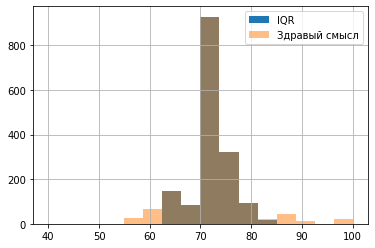

In [27]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

Однако такой способ отбора выбросов работает не всегда. Когда мы знаем потенциальные характеристики распределения, лучше отобрать их, пользуясь здравым смыслом. Как видно, формула выбросов в нашем случае помечает как выбросы слишком много потенциально реальных значений, поэтому воспользуемся здравым смыслом. Очевидно, что при сборе данных произошла ошибка. К сожалению, такое случается нередко.

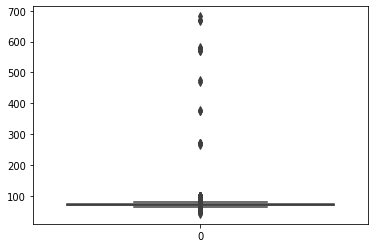

In [28]:
# можно было бы также как и в случае выше построить ящик с усами
sns.boxplot( data=cacao.cocoa_percent)

Обратите внимание на ящике с усами не очень четко видны границы ящика (и это понятно из графика выше - так как границы выбросов находятся очень близко к медиане) Можно применить логарифмирование и проверить распределение на логнормальность

In [29]:
cacao_ln = cacao.cocoa_percent.apply(lambda x: math.log(x))

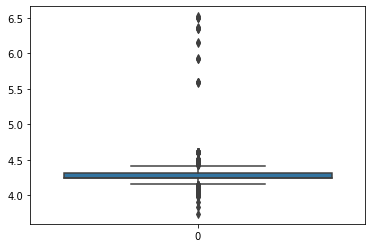

In [30]:
sns.boxplot( data=cacao_ln)

In [31]:
math.log(100)

4.605170185988092

видно что логарифмирование не помогло внести ясность и здесь скорее всего возможны три варианта к которым привел метод сбора информации:
1. в распределении смесь двух распределений - логнормальное с длинным правым хвостом (я проверил эту гипотезу не буду приводить тут выкладки, она не подтвердилась)
2. в распределении смесь двух нормальных распределений - признаюсь я не проверил эту гипотезу
3. что-то еще или ошибка при сборе данных

Поэтому на графике выше есть слова про здравый смысл, и я еще еще раз повторю комментарий выше чтобы продолжить: 

*Однако такой способ отбора выбросов работает не всегда. Когда мы знаем потенциальные характеристики распределения, лучше отобрать их, пользуясь здравым смыслом. Как видно, формула выбросов в нашем случае помечает как выбросы слишком много потенциально реальных значений, поэтому воспользуемся здравым смыслом. Очевидно, что при сборе данных произошла ошибка. К сожалению, такое случается нередко.*

In [32]:
# поэтому делаем отсечку на 100
cacao = cacao.loc[cacao.cocoa_percent <= 100]

# 2.4. Первичный анализ данных в столбцах. Часть II

## посмотрим на распределение столбца Company Location — страна, в которой произведён шоколадный батончик.

In [33]:
# Посмотрим на данные в столбце страны-производителя:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [34]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Czech Republic,1
Martinique,1
Suriname,1
Ghana,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


Стран намного меньше, чем регионов — всего 60. Стран, у которых больше 10 ревью — целых 22. Пустых значений нет (ура!).

## посмотрим на распределение столбца Rating — оценка батончика фокус-группой

Rating — важный столбец, так как именно рейтинг шоколада будет учиться предсказывать будущая модель.

In [35]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

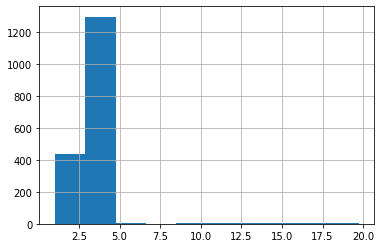

In [36]:
# Посмотрим на распределение оценок:
cacao.rating.hist()
cacao.rating.describe()

Как мы видим, большинство оценок распределены между 3 и 3.5 (медиана 3.25, 25-й перцентиль 3 и 75-й — 3.5), что позволяет сделать два предположения:

1. Скорее всего была использована пятибалльная шкала оценивания
2. В данных есть выбросы.

Давайте это проверим:

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


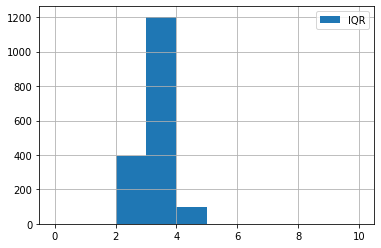

In [37]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:

In [38]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [58]:
# при этом левый край отрезка 
perc25 - 1.5*IQR

2.25

In [60]:
# а правый край отрезка
perc75 + 1.5*IQR

4.25

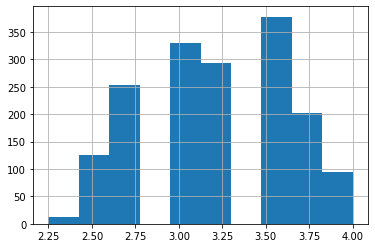

In [57]:
# посмотрим что у нас получилось
cacao.rating.hist()

## посмотрим на распределение столбца Bean Type — вид какао-бобов, используемых в батончике

In [39]:
# Сразу заменим пропуски на None:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [40]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [41]:
# Мы видим, что есть строка со значением nan, надо заменить её на None для удобства. 
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

Также мы видим, что многие типы бобов указаны с пояснением, например "Criollo (Ocumare 67)", такие значения стоит привести к общему виду.

Также некоторые батончики сделаны из комбинации какао-бобов. Возможно, этот столбец для дальнейшего анализа нужно будет преобразовать через метод get_dummies(), однако сейчас мы делать этого не будем.

In [42]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Beniano,3
EET,3
Matina,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


Мы сократили количество уникальных значений в столбце до 21. Пустые значения заполнить не получится, так как есть пять самых популярных (10+ батончиков) сортов какао.

## посмотрим на распределение столбца Broad Bean Origin — название региона, где были выращены какао-бобы.

### Задание 2.4.1
Самостоятельно обработайте пропуски в этом столбце, заменив их на None, и ответьте на вопросы:

1. Сколько уникальных значений содержит столбец?
2. Сколько из них встречаются более 10 раз?

In [43]:
# сколько мест происхождения содержит наш датасет
pd.DataFrame(cacao.broad_origin.value_counts())

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
Madagascar & Ecuador,1
"Africa, Carribean, C. Am.",1
"Venezuela, Ghana",1
"Peru, Madagascar",1


!обратите внимание! раньше строки с пустыми значениями были наверху и легко можно было сделать вывод об их наличии. В текущем варианте мы можем только спредпологать что их нет. 
А давайте напишем проверку для пустых значений?

In [44]:
# проверка для пустых значений
# для этого создаем новый ряд в который записываем 1 если пропуск есть
cacao_broad_origin_empty = cacao.broad_origin.astype(str).apply(lambda x: 1 if x.strip() == '' else 0)

# дальше суммируем значения
cacao_broad_origin_empty.sum()

59

In [45]:
# видим что пустые значения есть и их 59
# проверим на исходном датафрейме
cacao.broad_origin.value_counts()[cacao.broad_origin.value_counts()>=59]

Venezuela             202
Ecuador               179
Peru                  159
Madagascar            138
Dominican Republic    135
                       59
Name: broad_origin, dtype: int64

In [46]:
# ну вот на седьмом месте в списке оригинального датафрейма собраны пропуски
# удалим их
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [47]:
# проверка для nan значений
# для этого создаем новый ряд в который записываем 1 если пропуск есть
cacao_broad_origin_empty = cacao.broad_origin.astype(str).apply(lambda x: 1 if x.strip() == 'nan' else 0)

# дальше суммируем значения
cacao_broad_origin_empty.sum()

1

In [48]:
# видим что nan значение одно заменим его None
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [49]:
# ну и ответ на первый пункт задания
print(cacao.broad_origin.nunique())

97


In [50]:
# а теперь выведем сколько вариантов более 10 раз
print("Значений, встретившихся в столбце более 10 раз:"
      
      , (cacao.broad_origin.value_counts()>10).sum())
cacao.loc[:, ['broad_origin']].info()

Значений, встретившихся в столбце более 10 раз: 26
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [51]:
# выведем уникальные значения названий региона
mylist = sorted(filter(None,list(cacao.broad_origin.unique())))
mylist

['Africa, Carribean, C. Am.',
 'Australia',
 'Belize',
 'Bolivia',
 'Brazil',
 'Burma',
 'Cameroon',
 'Carribean',
 'Carribean(DR/Jam/Tri)',
 'Central and S. America',
 'Colombia',
 'Colombia, Ecuador',
 'Congo',
 'Cost Rica, Ven',
 'Costa Rica',
 'Cuba',
 'DR, Ecuador, Peru',
 'Dom. Rep., Madagascar',
 'Domincan Republic',
 'Dominican Rep., Bali',
 'Dominican Republic',
 'Ecuador',
 'Ecuador, Costa Rica',
 'Ecuador, Mad., PNG',
 'El Salvador',
 'Fiji',
 'Gabon',
 'Ghana',
 'Ghana, Domin. Rep',
 'Gre., PNG, Haw., Haiti, Mad',
 'Grenada',
 'Guat., D.R., Peru, Mad., PNG',
 'Guatemala',
 'Haiti',
 'Hawaii',
 'Honduras',
 'India',
 'Indonesia',
 'Indonesia, Ghana',
 'Ivory Coast',
 'Jamaica',
 'Liberia',
 'Mad., Java, PNG',
 'Madagascar',
 'Madagascar & Ecuador',
 'Malaysia',
 'Martinique',
 'Mexico',
 'Nicaragua',
 'Nigeria',
 'None',
 'PNG, Vanuatu, Mad',
 'Panama',
 'Papua New Guinea',
 'Peru',
 'Peru(SMartin,Pangoa,nacional)',
 'Peru, Belize',
 'Peru, Dom. Rep',
 'Peru, Ecuador',
 'Per

Обратим внимание, что в столбце много повторяющихся значений с различным написанием. 

In [52]:
# Давайте это исправим, написав дополнительную функцию:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [53]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [54]:
# Посмотрим, как изменились данные:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
Suriname,1
"Peru,Madagascar",1
"Venezuela,DomincanRepublic",1
"Africa,Carribean,C.Am.",1


Значений, упомянутых более 10 раз: 26
Уникальных значений: 94
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


Мы сократили количество уникальных значений (хотя и всего на 4). Однако такая трансформация в последствии поможет нам преобразовать данные через метод get_dummies(). Пропущенные значения заполнить не получится, так как данных всё ещё достаточно мало.

# 2.5. Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

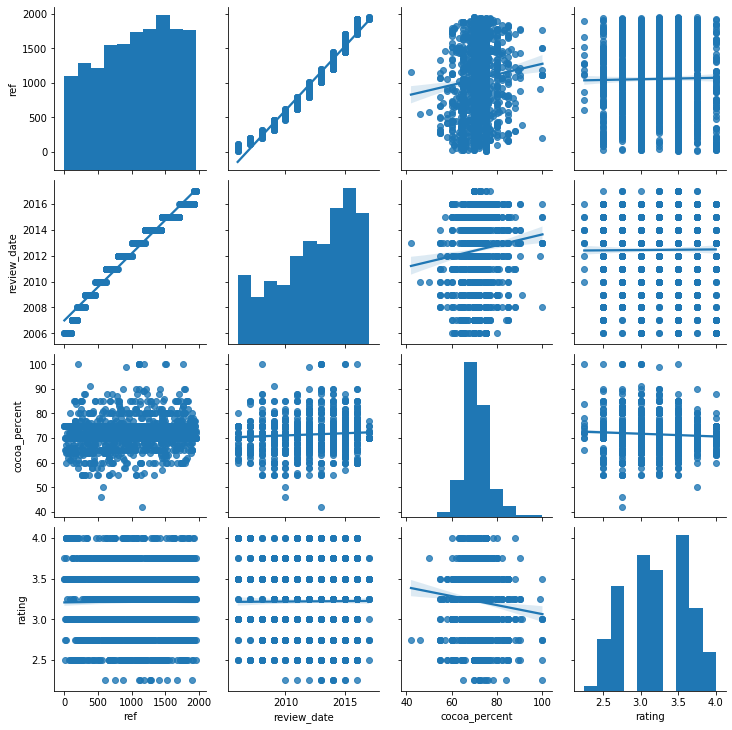

In [55]:
# Для быстрого построения графиков зависимости переменных 
# можно воспользоваться функцией pairplot из модуля seaborn:
sns.pairplot(cacao, kind = 'reg')

In [56]:
# Используем для наглядности матрицу корреляций:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются

# 2.6. Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [61]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

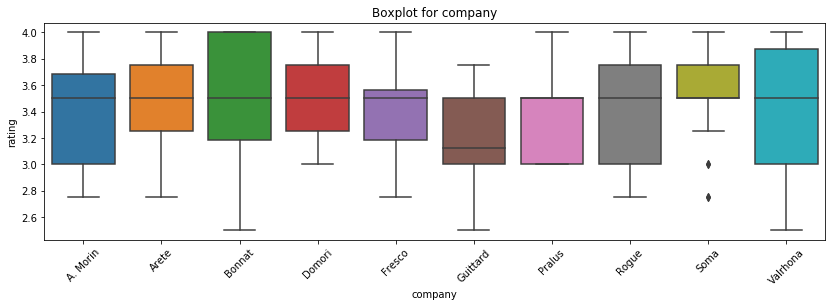

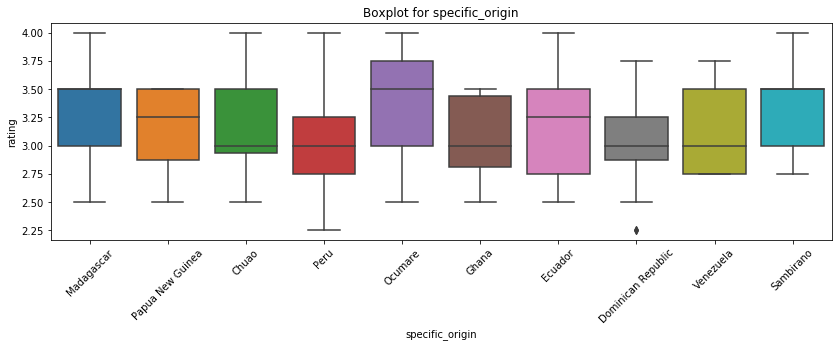

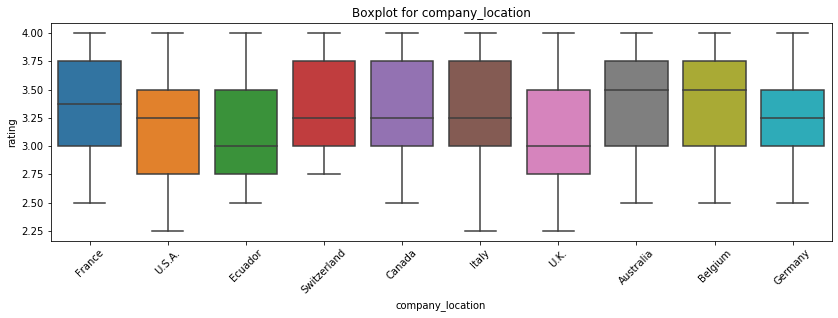

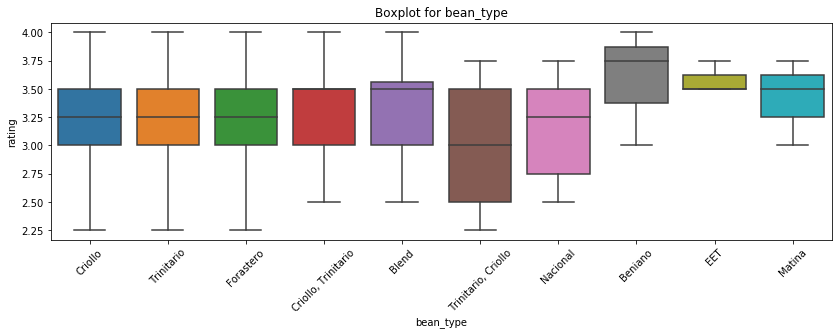

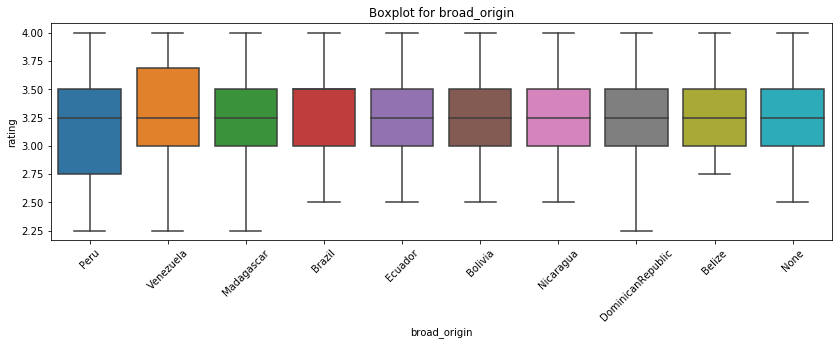

In [62]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [63]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [64]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


Как мы видим, серьёзно отличаются только два параметра: company и company_location. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, company_location, review_date, cocoa_percent.

In [65]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,review_date,cocoa_percent
1,A. Morin,Kpime,2015,70.0
3,A. Morin,Akata,2015,70.0
4,A. Morin,Quilla,2015,70.0
5,A. Morin,Carenero,2014,70.0
6,A. Morin,Cuba,2014,70.0


# 2.7. Выводы

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:

- В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
- Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
- Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company, company_location, review_date и cocoa_percent.